In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df.info()
df = df.dropna(subset=["AverageTemperature"])
df["dt"] = pd.to_datetime(df["dt"])
df["year"] = df["dt"].dt.year
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [5]:
df = df.sort_values("dt")
df["temp_filled"] = df.groupby("Country")["AverageTemperature"].transform(
    lambda x: x.fillna(x.rolling(window=5, min_periods=1).mean())
)

In [6]:
df["Decade"] = (df["year"] // 10) * 10
df["Decade"] = df["Decade"].astype(str) + "s"
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,temp_filled,Decade
0,1743-11-01,4.384,2.294,Åland,1743,4.384,1740s
261968,1743-11-01,9.538,1.944,Italy,1743,9.538,1740s
508635,1743-11-01,3.572,2.094,Switzerland,1743,3.572,1740s
206656,1743-11-01,10.806,2.132,Greece,1743,10.806,1740s
451046,1743-11-01,11.809,2.079,San Marino,1743,11.809,1740s


In [7]:
counts = df.groupby("Country")["year"].nunique()
valid_countries = counts[counts >= 100].index
df = df[df["Country"].isin(valid_countries)]
df.shape

(543245, 7)

In [11]:
decade_mean = df.groupby("Decade")["temp_filled"].mean()
decades = decade_mean.index
values = decade_mean.values.reshape(-1, 1)
values

array([[ 6.87967846],
       [ 8.64782517],
       [ 8.4547328 ],
       [ 8.71649523],
       [ 8.99413494],
       [10.37707346],
       [10.48960345],
       [ 9.85561979],
       [13.39575171],
       [11.29488376],
       [14.166124  ],
       [16.65671193],
       [16.69886229],
       [17.3349008 ],
       [17.83468806],
       [18.2740901 ],
       [18.36295048],
       [18.48363899],
       [18.62492221],
       [18.78969742],
       [18.85534681],
       [18.83388514],
       [18.84271701],
       [18.85941194],
       [19.04598142],
       [19.32124302],
       [19.61898392],
       [19.71135195]])

In [13]:
years = df["year"]
temps = df["temp_filled"]

slope, intercept = np.polyfit(years, temps, 1)

print("Slope (°C per year):", slope)
print("Slope (°C per decade):", slope * 10)

Slope (°C per year): 0.041071595157813875
Slope (°C per decade): 0.4107159515781388


In [15]:
current_year = df["year"].max()
future_years = np.arange(current_year, 2051)

baseline = intercept + slope * future_years
optimistic = intercept + (slope * 0.7) * future_years
pessimistic = intercept + (slope * 1.5) * future_years

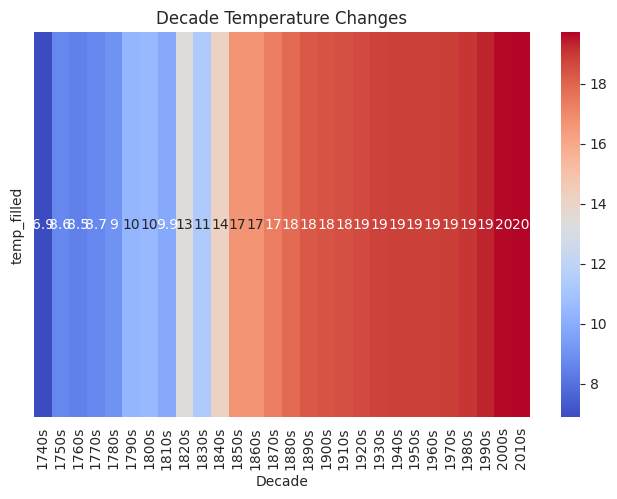

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(decade_mean.to_frame().T, annot=True, cmap="coolwarm")
plt.title("Decade Temperature Changes")
plt.show()